In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples = 1000, centers = 6, random_state= 110)

In [91]:
m = x.shape[0]
n = x.shape[1]

n_iters = 100

Text(0.5, 1.0, 'Original Dataset')

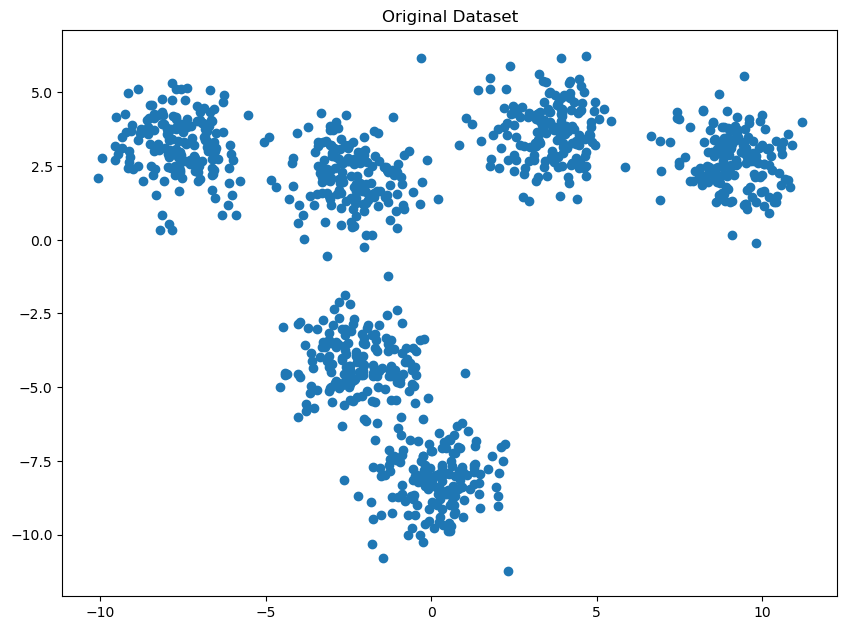

In [92]:
plt.scatter(x[:,0],x[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Original Dataset')

In [102]:
K = 6

import random


centroids = np.array([]).reshape(n,0)

In [103]:
for k in range(K):
    centroids = np.c_[centroids, x[random.randint(0, m-1)]]

In [104]:
centroids

array([[ -2.32983715,   7.90976104,   0.81379922,  -7.69959809,
         -1.46056884,  -0.28878026],
       [  1.79572622,   2.00598192,  -7.03300272,   3.75881288,
        -10.78443288,   1.95510437]])

In [105]:
output = {}

euclid = np.array([]).reshape(m, 0)

for k in range(K):
    dist = np.sum((x-centroids[:, k])**2, axis = 1)
    euclid = np.c_[euclid, dist]

In [106]:
minimum=np.argmin(euclid,axis=1)+1

In [107]:
minimum

array([1, 1, 2, 1, 3, 2, 4, 3, 6, 1, 3, 1, 3, 2, 3, 4, 2, 1, 1, 3, 4, 2,
       3, 6, 2, 3, 1, 2, 6, 4, 3, 6, 4, 1, 3, 2, 2, 6, 3, 2, 3, 2, 2, 3,
       4, 2, 4, 1, 2, 6, 5, 1, 4, 4, 3, 2, 5, 6, 3, 1, 3, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 6, 3, 1, 2, 4, 2, 5, 3, 5, 2, 1, 4, 1, 3, 1, 2, 1,
       3, 3, 3, 3, 2, 3, 4, 1, 2, 1, 2, 2, 2, 2, 2, 4, 6, 1, 3, 2, 6, 1,
       4, 2, 3, 4, 3, 2, 1, 2, 4, 2, 3, 1, 1, 2, 3, 3, 6, 4, 3, 1, 1, 6,
       3, 1, 6, 3, 2, 2, 1, 3, 1, 3, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 4,
       3, 3, 3, 4, 4, 3, 3, 2, 3, 1, 3, 3, 2, 6, 2, 3, 1, 2, 2, 6, 5, 3,
       4, 2, 3, 3, 4, 6, 1, 6, 3, 3, 2, 4, 1, 4, 4, 4, 1, 6, 4, 1, 2, 3,
       2, 1, 3, 2, 2, 3, 1, 4, 3, 3, 4, 2, 2, 3, 6, 4, 1, 3, 3, 5, 3, 3,
       1, 4, 1, 3, 2, 3, 4, 1, 2, 2, 3, 4, 2, 6, 3, 3, 4, 2, 4, 3, 1, 2,
       1, 3, 5, 2, 3, 4, 2, 4, 4, 2, 6, 4, 1, 2, 3, 6, 2, 6, 2, 3, 4, 3,
       2, 6, 4, 2, 2, 4, 3, 1, 6, 4, 2, 6, 4, 4, 4, 2, 1, 2, 2, 6, 2, 6,
       1, 2, 6, 2, 5, 2, 3, 4, 1, 3, 6, 6, 4, 4, 4,

In [108]:
# computing the mean of separated clusters
cent={}
for k in range(K):
    cent[k+1]=np.array([]).reshape(2,0)

# assigning of clusters to points
for k in range(m):
    cent[minimum[k]]=np.c_[cent[minimum[k]],x[k]]
for k in range(K):
    cent[k+1]=cent[k+1].T

# computing mean and updating it
for k in range(K):
     centroids[:,k]=np.mean(cent[k+1],axis=0)

In [109]:
# repeating the above steps again and again
for i in range(n_iters):
      euclid=np.array([]).reshape(m,0)
      for k in range(K):
          dist=np.sum((x-centroids[:,k])**2,axis=1)
          euclid=np.c_[euclid,dist]
      C=np.argmin(euclid,axis=1)+1
      cent={}
      for k in range(K):
           cent[k+1]=np.array([]).reshape(2,0)
      for k in range(m):
           cent[C[k]]=np.c_[cent[C[k]],x[k]]
      for k in range(K):
           cent[k+1]=cent[k+1].T
      for k in range(K):
           centroids[:,k]=np.mean(cent[k+1],axis=0)
      final=cent

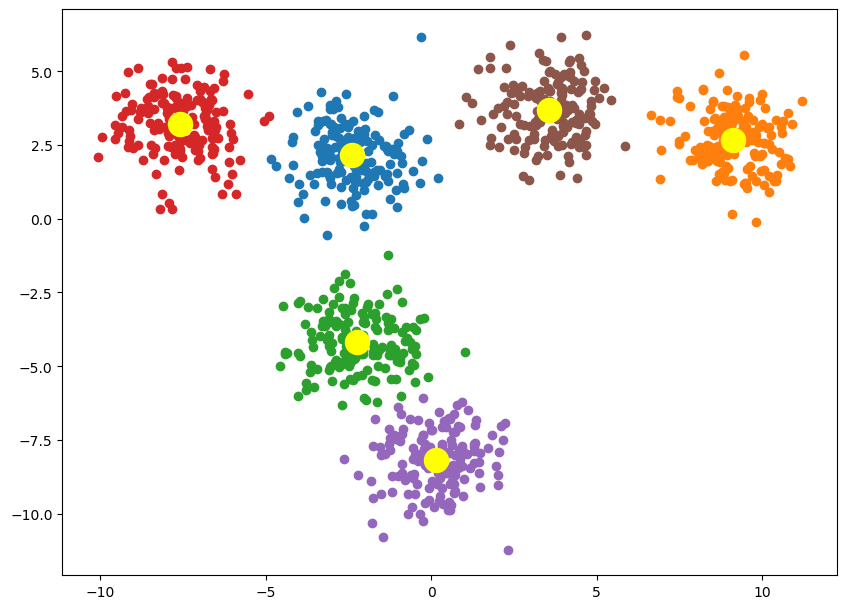

In [110]:
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()